In [2]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt 
import scipy.io
from utilities.BasisFunctions import makeBasis_StimKernel, makeBasis_PostSpike, sameconv
from utilities.izhikevich_neuron import generate_izhikevich_stim, simulate_izhikevich
from utilities.fit_GLM_params import fit_GLM


ImportError: DLL load failed while importing _imaging: The specified module could not be found.

# GLM for single neuron biophysics

This code uses the `Webber and Pillow 2017` MATLAB packages, modifies it and uses it to fit GLM to real RGCs. 


### Generate some data

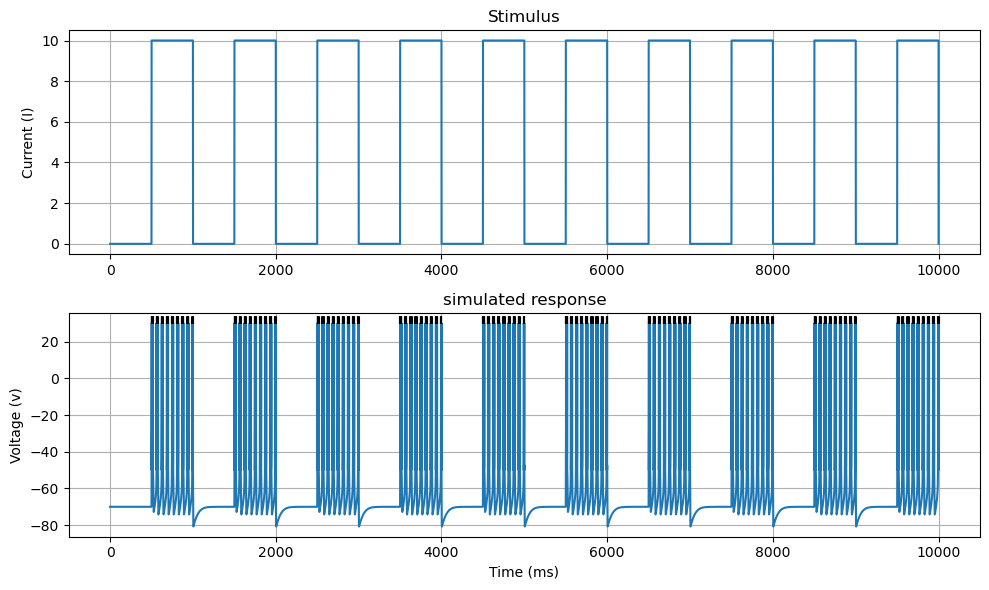

In [ ]:
# Generate stimulus (from previous function)
T = 10000
celltype =3
I, dt = generate_izhikevich_stim(celltype, T)
# Simulate and plot the results
v, u, spikes, cid = simulate_izhikevich(celltype, I, dt, jitter=1, plotFlag=True, saveFlag=False)


### Simulation

In [ ]:
# Define hyperparameters for basis functions (these can be optimized later)
kbasprs = {
    'neye': 0,           # Number of identity vectors at the front
    'ncos': 7,          # Number of raised cosine vectors for stimulus filter
    'kpeaks': [0, 83],   # Peak locations of the first and last basis vector (in ms)
    'b': 10             # Nonlinear stretching
}

ihbasprs = {
    'ncols': 7,          # Number of basis vectors for post-spike history filter
    'hpeaks': [0.1, 100], # Peak locations of first and last vector (in ms)
    'b': 10.0,              # Nonlinear stretching
    'absref': 1.0        # Absolute refractory period (in ms)
}


c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM\utilities\negloglike_glm.py:29: RuntimeWarning: overflow encountered in exp
  lambda_pred = NL(g)
c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM\utilities\negloglike_glm.py:38: RuntimeWarning: overflow encountered in multiply
  dL[pr] = -np.sum(prsMat[y.astype(bool), pr]) + dt / refreshRate * np.sum(prsMat[:, pr] * lambda_pred) + L2pen * 2 * prs[pr]
c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM\utilities\negloglike_glm.py:38: RuntimeWarning: invalid value encountered in multiply
  dL[pr] = -np.sum(prsMat[y.astype(bool), pr]) + dt / refreshRate * np.sum(prsMat[:, pr] * lambda_pred) + L2pen * 2 * prs[pr]
c:\Users\SchwartzLab\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM\utilities\negloglike_glm.py:44: R

Optimized parameters:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


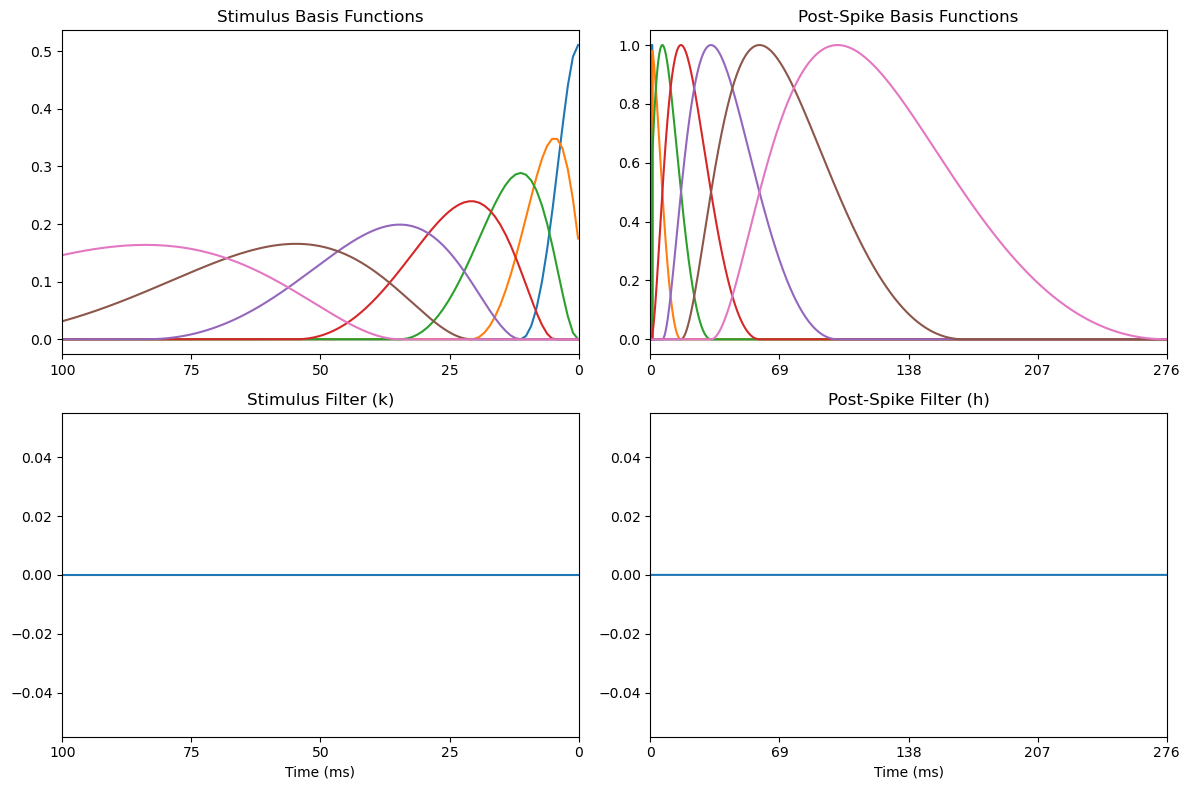

kbasis shape: (1000, 7)
kbasis min: [0. 0. 0. 0. 0. 0. 0.]
kbasis max: [0.51080266 0.34795953 0.28884443 0.23957392 0.19915483 0.16576745
 0.16388897]
Stimulus filter (k): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:


k, h, dc, prs_opt, kbasis, hbasis = fit_GLM(I, spikes, dt=dt, kbasprs=kbasprs, ihbasprs=ihbasprs, softRect=0,plotFlag=True,L2pen=0.00, maxIter=1000, tolFun=1e-12)

# Check the dimensions, min, and max of kbasis in Python
print("kbasis shape:", kbasis.shape)
print("kbasis min:", np.min(kbasis, axis=0))
print("kbasis max:", np.max(kbasis, axis=0))

# Also print the optimized parameters
print("Stimulus filter (k):", k)
print("Post-spike filter (h):", h)
print("DC offset (dc):", dc)


In [ ]:
# # L2 values to test (logarithmic scale)
# L2_values = np.logspace(-1, 1, 20)

# # Find optimal L2 regularization
# L2_values, negLL_values = find_optimal_L2(I, spikes, dt=0.01, kbasprs=kbasprs, ihbasprs=ihbasprs, L2_values=L2_values)

# Plot L2 regularization values against negative log-likelihood
plt.figure(figsize=(8, 6))
plt.plot(L2_values, negLL_values, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Logarithmic scale for L2 values
plt.xlabel('L2 Regularization (log scale)')
plt.ylabel('Negative Log-Likelihood')
plt.title('L2 Regularization vs Negative Log-Likelihood')
plt.grid(True)
plt.show()

NameError: name 'L2_values' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:

# L2 values to test (logarithmic scale)
L2_values = np.logspace(-1, 1, 20)

# Find optimal L2 regularization using cross-validation
best_L2, L2_values, negLL_values = find_optimal_L2_cv(
    I, spikes, dt=0.01, 
    kbasprs=kbasprs, 
    ihbasprs=ihbasprs, 
    L2_values=L2_values, 
    nkt=100, 
    maxIter=100, 
    tolFun=1e-8, 
    n_splits=5
)

# Plot L2 regularization values against average negative log-likelihood
plt.figure(figsize=(8, 6))
plt.plot(L2_values, negLL_values, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Logarithmic scale for L2 values
plt.xlabel('L2 Regularization (log scale)')
plt.ylabel('Average Negative Log-Likelihood (Validation)')
plt.title('L2 Regularization vs Average Negative Log-Likelihood (5-Fold CV)')
plt.grid(True)
plt.axvline(best_L2, color='r', linestyle='--', label=f'Best L2: {best_L2:.2e}')
plt.legend()
plt.show()

print(f"The optimal L2 regularization parameter is: {best_L2:.2e}")


c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM\utilities\negloglike_glm.py:29: RuntimeWarning: overflow encountered in exp
  lambda_pred = NL(g)
c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM\utilities\negloglike_glm.py:38: RuntimeWarning: invalid value encountered in multiply
  dL[pr] = -np.sum(prsMat[y.astype(bool), pr]) + dt / refreshRate * np.sum(prsMat[:, pr] * lambda_pred) + L2pen * 2 * prs[pr]
c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM\utilities\negloglike_glm.py:38: RuntimeWarning: overflow encountered in multiply
  dL[pr] = -np.sum(prsMat[y.astype(bool), pr]) + dt / refreshRate * np.sum(prsMat[:, pr] * lambda_pred) + L2pen * 2 * prs[pr]
c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM\utilities\negloglike_glm.py:44: RuntimeWarning: invalid value encountered in multiply
  H[pr1, pr2] = dt / refreshRate * np.sum(prsMat[:, pr1] * prsMat[:, pr2] * lambda_pred) + L2pen * 2 * (pr1 == pr2)
c:\Users\SchwartzLab\

KeyboardInterrupt: 

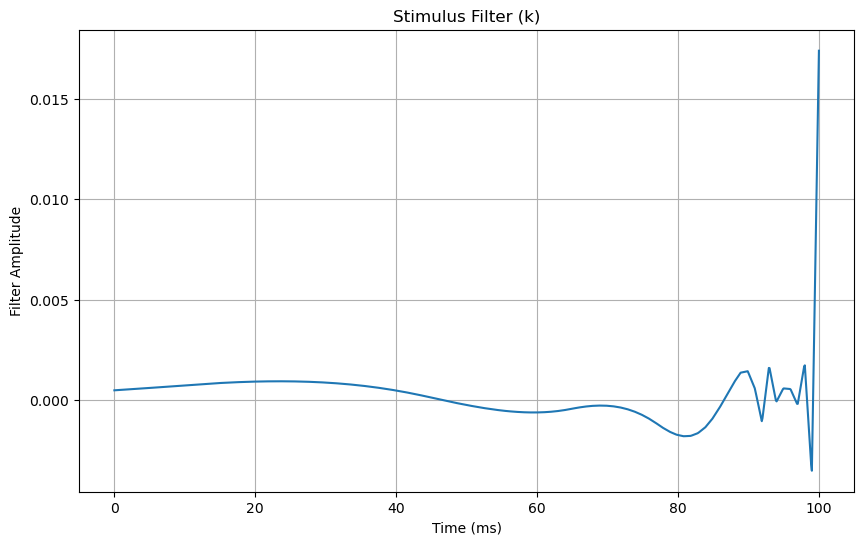

In [ ]:
plt.figure(figsize=(10, 6))
time_bins_k = np.linspace(0, len(k) * dt, len(k))
plt.plot(time_bins_k, k)
plt.title('Stimulus Filter (k)')
plt.xlabel('Time (ms)')
plt.ylabel('Filter Amplitude')
plt.grid(True)
plt.show()


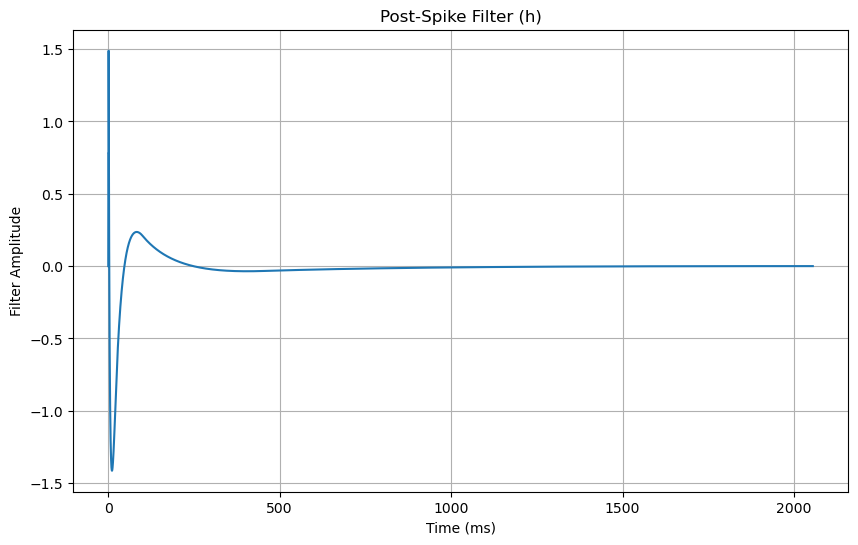

In [ ]:
plt.figure(figsize=(10, 6))
time_bins_h = np.linspace(0, len(h) * dt, len(h))
plt.plot(time_bins_h, h)
plt.title('Post-Spike Filter (h)')
plt.xlabel('Time (ms)')
plt.ylabel('Filter Amplitude')
plt.grid(True)
plt.show()


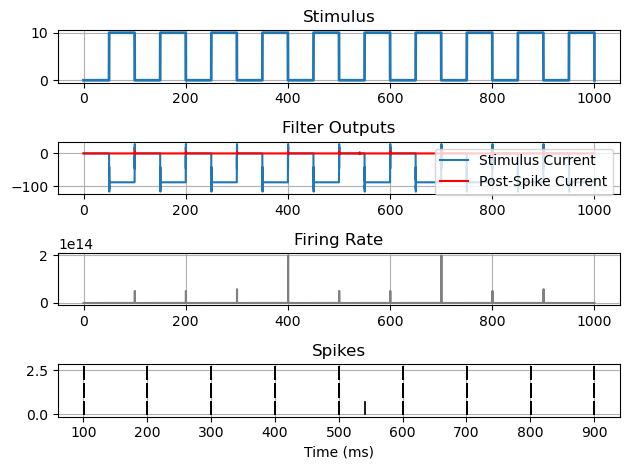

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_glm(x, dt, k, h, dc, runs=5, softRect=False, plotFlag=False):
    """
    Simulates a Poisson GLM response with stimulus and post-spike filters.

    Args:
        x: stimulus (input)
        dt: time step (in ms)
        k: stimulus filter (array)
        h: post-spike filter (array)
        dc: DC offset (float)
        runs: number of trials to simulate (default=5)
        softRect: If True, use soft rectifying nonlinearity (default=False)
        plotFlag: If True, plot the simulation results (default=False)

    Returns:
        y: simulated spike train (binary, 0s and 1s)
        stimcurr: output of stimulus filter (without DC current added)
        hcurr: output of post-spike filter
        r: firing rate (stimcurr + hcurr + dc passed through nonlinearity)
    """
    
    # Define the nonlinearity (logexp for soft-rectification, exponential otherwise)
    if softRect:
        NL = lambda x: np.log1p(np.exp(x))  # Soft rectification: log(1 + exp(x))
    else:
        NL = np.exp  # Standard exponential nonlinearity for Poisson GLM

    nTimePts = len(x)
    refreshRate = 1000 / dt  # Stimulus in ms, sampled at dt

    # Initialize outputs
    g = np.zeros((nTimePts + len(h), runs))  # Filtered stimulus + DC (with post-spike)
    y = np.zeros((nTimePts, runs))  # Response (spike train)
    r = np.zeros((nTimePts + len(h) - 1, runs))  # Firing rate (nonlinearity output)
    hcurr = np.zeros_like(g)  # Post-spike filter current
    stimcurr = np.convolve(x, k, mode='full')[:nTimePts]  # Stimulus filtered by k
    Iinj = stimcurr + dc  # Injected current includes DC

    # Main loop for each run
    for runNum in range(runs):
        g[:, runNum] = np.concatenate((Iinj, np.zeros(len(h))))  # Inject current into the system

        # Loop through each time point
        for t in range(nTimePts):
            # Compute firing rate
            r[t, runNum] = NL(g[t, runNum])  # Nonlinearity applied to input current
            
            # Sample spike with Poisson probability
            if np.random.rand() < (1 - np.exp(-r[t, runNum] / refreshRate)):  # P(spike)
                y[t, runNum] = 1  # Spike occurred
                # Add post-spike filter effect
                g[t:t+len(h), runNum] += h  # Add post-spike filter
                hcurr[t:t+len(h), runNum] += h

    # Trim padded zeros for hcurr and firing rate
    hcurr = hcurr[:nTimePts, :]
    r = r[:nTimePts, :]

    # Plot results if requested
    if plotFlag:
        t = np.arange(nTimePts) * dt

        # Plot stimulus
        plt.subplot(4, 1, 1)
        plt.plot(t, x, linewidth=2)
        plt.title('Stimulus')
        plt.grid()

        # Plot filter outputs
        plt.subplot(4, 1, 2)
        plt.plot(t, Iinj, label='Stimulus Current', linewidth=1.5)
        plt.plot(t, hcurr[:, 0], label='Post-Spike Current', color='red', linewidth=1.5)
        plt.title('Filter Outputs')
        plt.legend()
        plt.grid()

        # Plot firing rate
        plt.subplot(4, 1, 3)
        plt.plot(t, NL(hcurr[:, 0] + Iinj), color='gray', linewidth=1.5)
        plt.title('Firing Rate')
        plt.grid()

        # Plot GLM spikes
        plt.subplot(4, 1, 4)
        spikeHeight = 0.7
        for i in range(runs):
            spt = np.where(y[:, i])[0]
            for spikeTime in spt:
                plt.plot([spikeTime * dt, spikeTime * dt], [i, i + spikeHeight], color='black', linewidth=1.25)
        plt.title('Spikes')
        plt.xlabel('Time (ms)')
        plt.grid()

        plt.tight_layout()
        plt.show()

    return y, stimcurr, hcurr, r

# Simulated parameters
T = 1000
  # DC offset

# Simulate GLM response
y, stimcurr, hcurr, r = simulate_glm(I, dt=0.01, k=k, h=h, dc=dc, runs=3, softRect=False, plotFlag=True)



## GLM parameters. Figure out how to optimize them per celltype?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def find_optimal_L2(x, y, dt, kbasprs, ihbasprs, L2_values, nkt=100, maxIter=100, tolFun=1e-8):
    """
    Find the optimal L2 regularization parameter by fitting the GLM with different L2 values
    and comparing the negative log-likelihood.

    Args:
        x: Stimulus data
        y: Spike data (binary)
        dt: Time step (in ms)
        kbasprs: Parameters for stimulus filter basis
        ihbasprs: Parameters for post-spike filter basis
        L2_values: Array of L2 penalty values to evaluate
        nkt: Number of ms in stimulus filter
        maxIter: Maximum number of iterations for optimization
        tolFun: Tolerance for optimization function

    Returns:
        L2_values: The L2 penalty values
        negLL_values: The negative log-likelihood values corresponding to each L2
    """
    negLL_values = []

    for L2pen in L2_values:
        # Fit the GLM with the current L2 penalty
        k, h, dc, prs_opt, kbasis, hbasis = fit_GLM(x, y, dt, kbasprs, ihbasprs, plotFlag=False, 
                                                    L2pen=L2pen, nkt=nkt, maxIter=maxIter, tolFun=tolFun)
        
        # Create the convolution matrices as done in fit_GLM
        xconvki = np.zeros((len(y), kbasis.shape[1]))  # Stimulus convolved with stimulus filters
        yconvhi = np.zeros((len(y), hbasis.shape[1]))  # Spike response convolved with post-spike filters

        # Convolve stimulus with each basis vector
        for knum in range(kbasis.shape[1]):
            xconvki[:, knum] = sameconv(x, kbasis[:, knum])

        # Convolve response with flipped post-spike basis vector
        for hnum in range(hbasis.shape[1]):
            yconvhi[:, hnum] = sameconv(y, np.flipud(hbasis[:, hnum]))
        
        # Extract the number of stimulus and post-spike filter coefficients
        nkbasis = kbasis.shape[1]  # Number of stimulus filter coefficients
        nhbasis = hbasis.shape[1]  # Number of post-spike filter coefficients

        # Nonlinearity (exponential for Poisson GLM)
        g = np.dot(xconvki, prs_opt[:nkbasis]) + np.dot(yconvhi, prs_opt[nkbasis:nkbasis+nhbasis]) + prs_opt[-1]
        lambda_pred = np.exp(g)
        
        # Negative log-likelihood calculation
        negLL = -np.dot(y, g) + dt * np.sum(lambda_pred)
        negLL_values.append(negLL)
    
    return L2_values, negLL_values



In [ ]:
from sklearn.model_selection import KFold

def find_optimal_L2_cv(x, y, dt, kbasprs, ihbasprs, L2_values, nkt=100, maxIter=100, tolFun=1e-8, n_splits=5):
    """
    Find the optimal L2 regularization parameter using k-fold cross-validation.
    
    Args:
        x: Stimulus data
        y: Spike data (binary)
        dt: Time step (in ms)
        kbasprs: Parameters for stimulus filter basis
        ihbasprs: Parameters for post-spike filter basis
        L2_values: Array of L2 penalty values to evaluate
        nkt: Number of ms in stimulus filter
        maxIter: Maximum number of iterations for optimization
        tolFun: Tolerance for optimization function
        n_splits: Number of folds for cross-validation
    
    Returns:
        best_L2: The L2 penalty value with the lowest average validation NLL
        L2_values: The L2 penalty values evaluated
        negLL_values: The average negative log-likelihood values across folds for each L2
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    negLL_values = np.zeros(len(L2_values))
    
    for idx, L2pen in enumerate(L2_values):
        fold_negLL = []
        for train_index, val_index in kf.split(x):
            # Split data
            x_train, x_val = x[train_index], x[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            # Fit the GLM on training data
            k, h, dc, prs_opt, kbasis, hbasis = fit_GLM(x_train, y_train, dt, kbasprs, ihbasprs, plotFlag=False, 
                                                        L2pen=L2pen, nkt=nkt, maxIter=maxIter, tolFun=tolFun)
            
            # Create convolution matrices for validation data
            xconvki_val = np.zeros((len(y_val), kbasis.shape[1]))  # Stimulus convolved with stimulus filters
            yconvhi_val = np.zeros((len(y_val), hbasis.shape[1]))  # Spike response convolved with post-spike filters

            for knum in range(kbasis.shape[1]):
                xconvki_val[:, knum] = sameconv(x_val, kbasis[:, knum])

            for hnum in range(hbasis.shape[1]):
                yconvhi_val[:, hnum] = sameconv(y_val, np.flipud(hbasis[:, hnum]))
            
            # Extract the number of stimulus and post-spike filter coefficients
            nkbasis = kbasis.shape[1]
            nhbasis = hbasis.shape[1]
    
            # Compute linear prediction
            g_val = np.dot(xconvki_val, prs_opt[:nkbasis]) + np.dot(yconvhi_val, prs_opt[nkbasis:nkbasis+nhbasis]) + prs_opt[-1]
            lambda_pred_val = np.exp(g_val)
            
            # Compute negative log-likelihood on validation set
            negLL = -np.dot(y_val, g_val) + dt * np.sum(lambda_pred_val)
            fold_negLL.append(negLL)
        
        # Average NLL across folds for current L2
        negLL_values[idx] = np.mean(fold_negLL)
    
    # Select the L2 with the lowest average NLL
    best_idx = np.argmin(negLL_values)
    best_L2 = L2_values[best_idx]
    
    return best_L2, L2_values, negLL_values


In [ ]:
from sklearn.model_selection import ParameterGrid
import random
# Define hyperparameter grid
hyperparam_grid = {
    'L2pen': np.logspace(-4, 3, 10),  # L2 regularization values
    'kbas_ncos': [5, 10, 15],         # Number of stimulus basis vectors
    'ihbas_ncols': [5, 7, 10],        # Number of post-spike basis vectors
    'kbas_b': [0.5, 1.0, 1.5],        # Nonlinear stretching for stimulus
    'ihbas_b': [0.5, 1.0, 1.5],       # Nonlinear stretching for post-spike
    'kbas_kpeaks': [(0, 10), (0, 20)],  # Peak locations for stimulus filter
    'ihbas_hpeaks': [(0.1, 2), (0.1, 5)]  # Peak locations for post-spike filter
}

# Generate all combinations of hyperparameters (grid search)
param_combinations = list(ParameterGrid(hyperparam_grid))
# Randomly select parameter combinations
param_combinations = random.sample(list(ParameterGrid(hyperparam_grid)), 20)
def hyperparam_search(x, y, dt, param_combinations, nkt=100, n_splits=5, maxIter=100, tolFun=1e-8):
    """
    Perform grid search hyperparameter optimization using cross-validation.
    
    Args:
        x: Stimulus data
        y: Spike data (binary)
        dt: Time step (in ms)
        param_combinations: List of hyperparameter combinations to test
        nkt: Number of ms in stimulus filter
        n_splits: Number of folds for cross-validation
        maxIter: Maximum number of iterations for optimization
        tolFun: Tolerance for optimization function
    
    Returns:
        best_params: The hyperparameter combination with the lowest average validation NLL
        param_combinations: All evaluated hyperparameter combinations
        negLL_values: The average negative log-likelihood values across folds for each combination
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    negLL_values = np.zeros(len(param_combinations))
    
    for idx, params in enumerate(param_combinations):
        fold_negLL = []
        
        # Update kbasprs and ihbasprs based on current parameter combination
        kbasprs = {
            'neye': 5,
            'ncos': params['kbas_ncos'],
            'kpeaks': params['kbas_kpeaks'],
            'b': params['kbas_b']
        }

        ihbasprs = {
            'ncols': params['ihbas_ncols'],
            'hpeaks': params['ihbas_hpeaks'],
            'b': params['ihbas_b'],
            'absref': 0.1
        }

        for train_index, val_index in kf.split(x):
            # Split data into training and validation sets
            x_train, x_val = x[train_index], x[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            # Fit the GLM on training data with current hyperparameters
            k, h, dc, prs_opt, kbasis, hbasis = fit_GLM(x_train, y_train, dt, kbasprs, ihbasprs, 
                                                        plotFlag=False, L2pen=params['L2pen'], 
                                                        nkt=nkt, maxIter=maxIter, tolFun=tolFun)
            
            # Create convolution matrices for validation data
            xconvki_val = np.zeros((len(y_val), kbasis.shape[1]))
            yconvhi_val = np.zeros((len(y_val), hbasis.shape[1]))

            for knum in range(kbasis.shape[1]):
                xconvki_val[:, knum] = sameconv(x_val, kbasis[:, knum])

            for hnum in range(hbasis.shape[1]):
                yconvhi_val[:, hnum] = sameconv(y_val, np.flipud(hbasis[:, hnum]))
    
            # Extract number of basis coefficients
            nkbasis = kbasis.shape[1]
            nhbasis = hbasis.shape[1]

            # Compute linear prediction and lambda
            g_val = np.dot(xconvki_val, prs_opt[:nkbasis]) + np.dot(yconvhi_val, prs_opt[nkbasis:nkbasis+nhbasis]) + prs_opt[-1]
            lambda_pred_val = np.exp(g_val)
            
            # Compute negative log-likelihood on validation set
            negLL = -np.dot(y_val, g_val) + dt * np.sum(lambda_pred_val)
            fold_negLL.append(negLL)
        
        # Average NLL across folds for current hyperparameter combination
        negLL_values[idx] = np.mean(fold_negLL)
    
    # Select the hyperparameter combination with the lowest average NLL
    best_idx = np.argmin(negLL_values)
    best_params = param_combinations[best_idx]
    
    return best_params, param_combinations, negLL_values


c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM\utilities\BasisFunctions.py:67: RuntimeWarning: invalid value encountered in divide
  kbasis = kbasis / np.sqrt(np.sum(kbasis ** 2, axis=0))
c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM\utilities\BasisFunctions.py:67: RuntimeWarning: invalid value encountered in divide
  kbasis = kbasis / np.sqrt(np.sum(kbasis ** 2, axis=0))
c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM\utilities\BasisFunctions.py:67: RuntimeWarning: invalid value encountered in divide
  kbasis = kbasis / np.sqrt(np.sum(kbasis ** 2, axis=0))


Best Hyperparameters: {'L2pen': 166.81005372000593, 'ihbas_b': 1.0, 'ihbas_hpeaks': (0.1, 2), 'ihbas_ncols': 5, 'kbas_b': 1.0, 'kbas_kpeaks': (0, 10), 'kbas_ncos': 15}


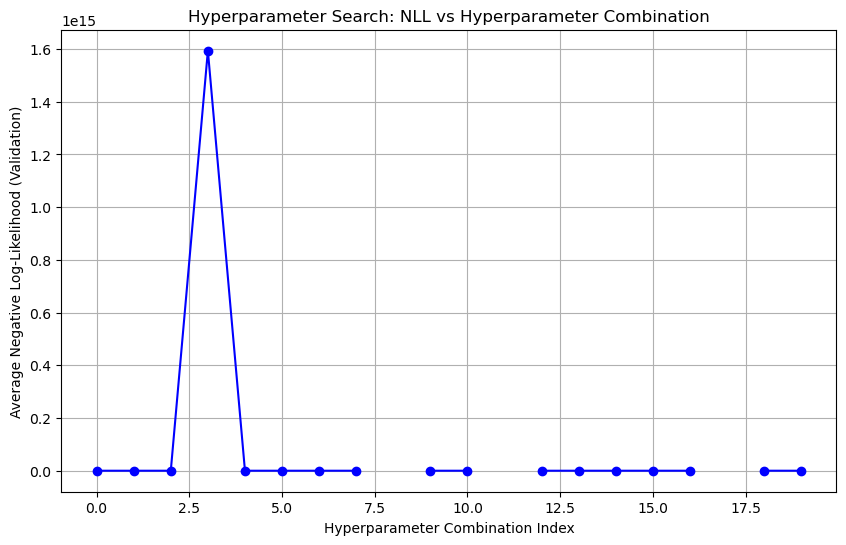

In [ ]:
# Generate random data for example
x = np.random.randn(500)  # Random stimulus
y = (np.random.rand(500) > 0.9).astype(int)  # Random binary spike data

# Run the hyperparameter search with cross-validation
best_params, param_combinations, negLL_values = hyperparam_search(
    x, y, dt=0.01, param_combinations=param_combinations, nkt=100, n_splits=5, maxIter=100, tolFun=1e-8
)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Plot the results: NLL vs. Hyperparameter Index
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(param_combinations)), negLL_values, marker='o', linestyle='-', color='b')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Average Negative Log-Likelihood (Validation)')
plt.title('Hyperparameter Search: NLL vs Hyperparameter Combination')
plt.grid(True)
plt.show()


In [ ]:
nkt=100 # number of ms in stim filter
kbasprs = {} # dictionary with parameters of stimulus filter basis vectors
kbasprs['neye'] = 0  #number of "identity" basis vectors near time of spike
kbasprs['ncos'] = 7 #number of raised-cosine vectors to use
kbasprs['kpeaks'] = [0.1, int(nkt/2)] # position of first and last bump (realtive to identity bumps)
kbasprs['b'] = 10 # how nonlinear to make spacings

ihbasprs = {} # dictionary with parameters of post-spike filter basis vectors
ihbasprs['ncols'] = 7 # number of basis vectors for post-spike kernel
ihbasprs['hpeaks'] = [0.1, int(nkt/2)] # peak location for first and last vectors, in ms
ihbasprs['b'] = 10 # how nonlinear to make spacings (larger -> more linear)
ihbasprs['absref'] = 1 # absolute refractory period, in ms  

softRect = 0 # 0 uses exponential nonlinearity; 1 uses soft-rectifying nonlinearity
plotFlag = 0
maxIter = 100
tolFun = 1e-3
L2pen = 0   

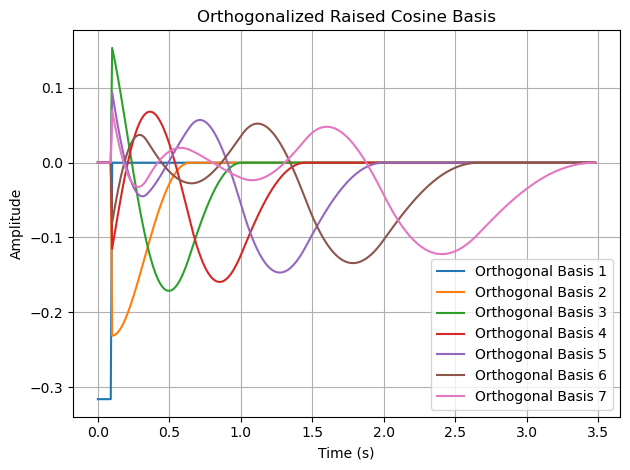

In [ ]:
# Define the simulated parameters for ihprs (based on your previous examples)
ihprs = {
    'ncols': 7,            # Number of basis vectors
    'hpeaks': [0.1, 2.0],  # First and last peak locations of the basis vectors
    'b': 1,              # Offset for nonlinear stretching
    'absref': 0.1          # Absolute refractory period
}

# Set time step and optional time lattice
dt = 0.01  # Time step (in seconds)
# iht0 = np.arange(0, 5, dt)  # Optional time lattice, from 0 to 5 seconds


# Call the function
iht, ihbas, ihbasis = makeBasis_PostSpike(ihprs, dt)

# Plot the generated basis functions

for i in range(ihbas.shape[1]):
    plt.plot(iht, ihbas[:, i], label=f'Orthogonal Basis {i+1}')
plt.title('Orthogonalized Raised Cosine Basis')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


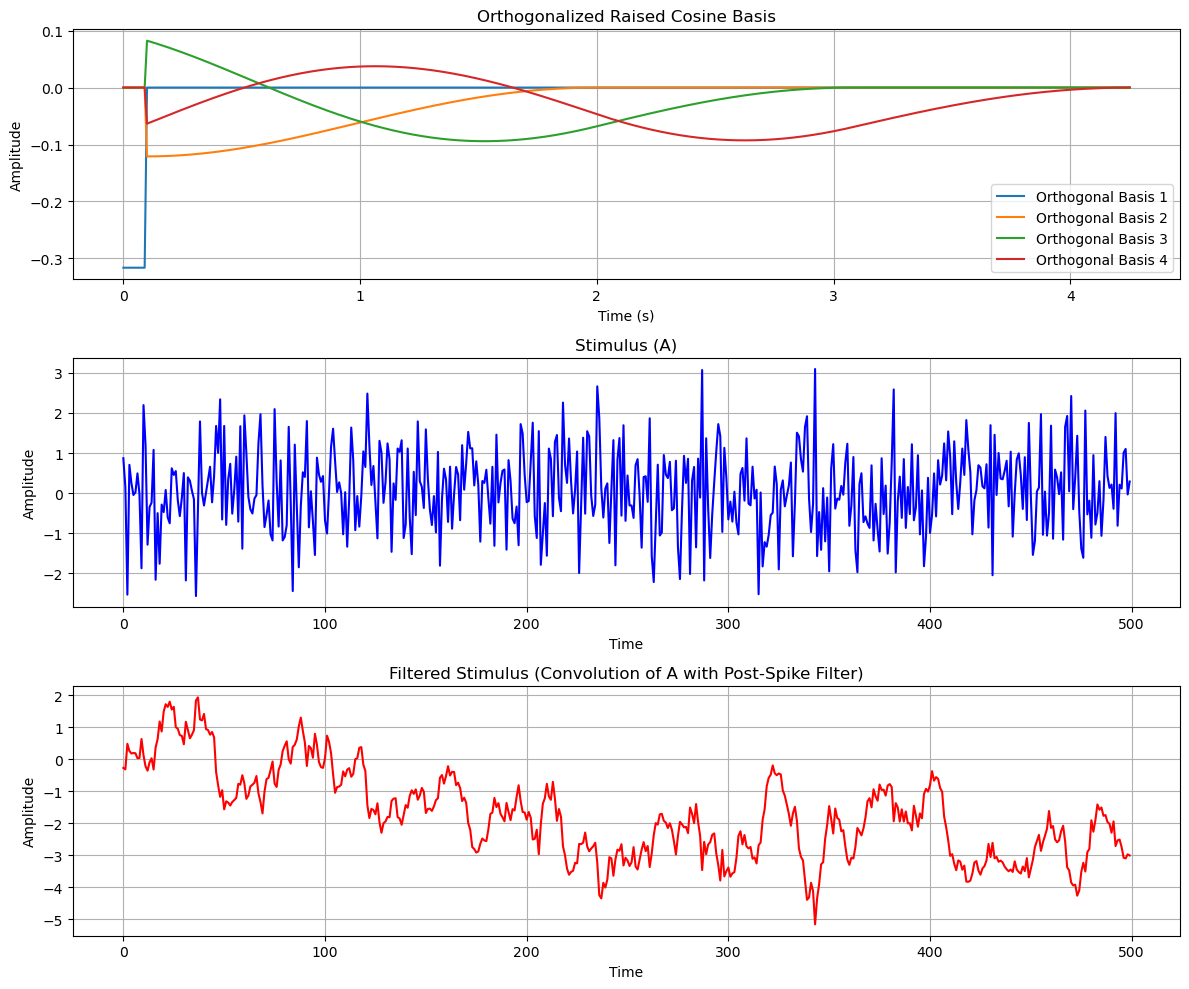

In [ ]:



ihprs = {
    'ncols': 4,            # Number of basis vectors
    'hpeaks': [0.1, 2.0],  # First and last peak locations of the basis vectors
    'b': 10,                # Offset for nonlinear stretching
    'absref': 0.1          # Absolute refractory period
}

dt = 0.01  # Time step (in seconds)

# Call the function to generate the post-spike basis
iht, ihbas, ihbasis = makeBasis_PostSpike(ihprs, dt)

# Simulate input data (stimulus A)
time_steps = 500  # Length of stimulus
A = np.random.randn(time_steps)  # Simulated stimulus (Gaussian random values)

# Convolve the stimulus with each post-spike filter basis and plot the results
plt.figure(figsize=(12, 10))

# Plot the post-spike basis vectors
for i in range(ihbas.shape[1]):
    plt.subplot(3, 1, 1)
    plt.plot(iht, ihbas[:, i], label=f'Orthogonal Basis {i+1}')
plt.title('Orthogonalized Raised Cosine Basis')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Perform convolution using sameconv for each basis vector
conv_results = []
for i in range(ihbas.shape[1]):
    conv_result = sameconv(A, ihbas[:, i])  # Convolve stimulus A with each basis vector
    conv_results.append(conv_result)

# Sum the convolution results to get the total filtered signal
filtered_stimulus = np.sum(conv_results, axis=0)

# Plot the original stimulus (A)
plt.subplot(3, 1, 2)
plt.plot(A, label='Stimulus (A)', color='blue')
plt.title('Stimulus (A)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the filtered stimulus (convolution result)
plt.subplot(3, 1, 3)
plt.plot(filtered_stimulus, label='Filtered Stimulus', color='red')
plt.title('Filtered Stimulus (Convolution of A with Post-Spike Filter)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

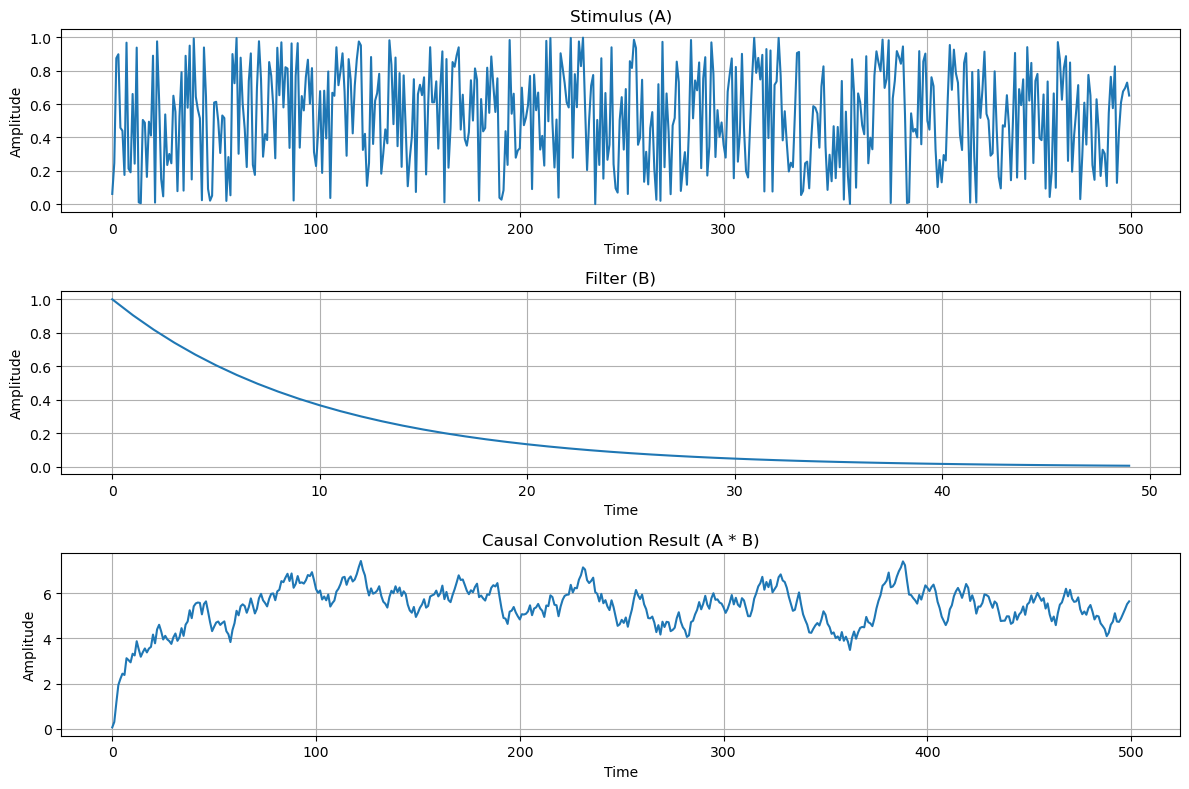

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Simulate input data (stimulus A) and filter B
time_steps = 500  # Length of stimulus
A = np.random.rand(time_steps)  # Simulated stimulus (random values)
B = np.exp(-np.arange(0, 50)/10)  # Exponential filter (decaying)

# Perform convolution using sameconv
conv_result = sameconv(A, B)

# Plot the stimulus A
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(A, label='Stimulus (A)')
plt.title('Stimulus (A)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the filter B
plt.subplot(3, 1, 2)
plt.plot(B, label='Filter (B)')
plt.title('Filter (B)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the convolution result
plt.subplot(3, 1, 3)
plt.plot(conv_result, label='Convolution Result')
plt.title('Causal Convolution Result (A * B)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
mat_data = scipy.io.loadmat('PixON_vectors.mat')
spikes = mat_data['spikes']  # Spikes vector
dt = mat_data['dt']       # Time resolution (dt)
t = mat_data['t']         # Time vector